K-means Clustering

Number of articles per cluster for k = 10
Cluster 0: 545
Cluster 1: 177
Cluster 2: 233
Cluster 3: 155
Cluster 4: 126
Cluster 5: 135
Cluster 6: 198
Cluster 7: 239
Cluster 8: 385
Cluster 9: 32


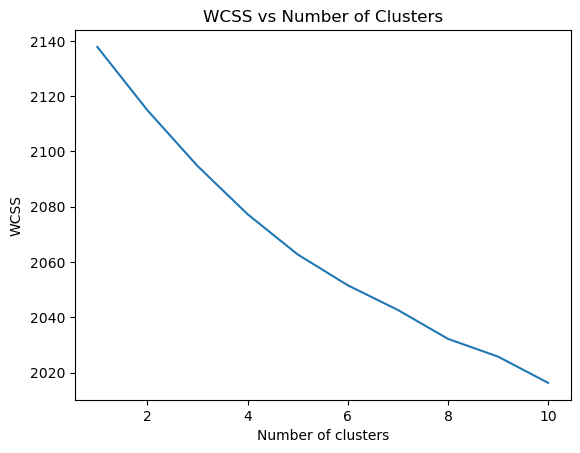

c:\Users\52871\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52871\AppData\Local\Temp\ipykernel_24512\1194572874.py:80: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data[:,0], cluster_data[:,1], c=colors[i], cmap="rainbow", alpha=0.7, edgecolors="w", s=100)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


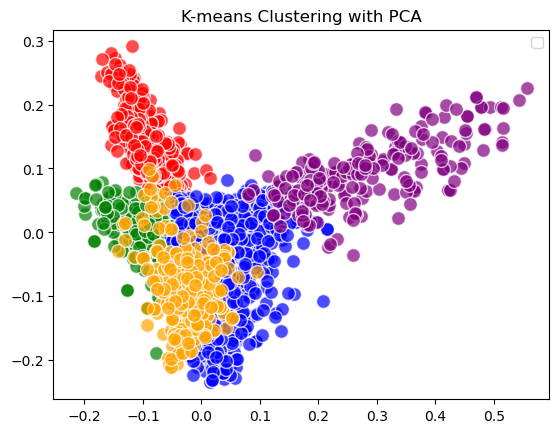

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Packages to install (nltk)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 



# Import the dataset
ds = pd.read_csv('bbc-news-data-modified.csv')

ds["text"] = ds["title"] + " " + ds["content"]

#Tokenization
ds["text"] = ds["text"].apply(lambda x: x.split())


#Stopwords
stop_w = set(stopwords.words("english"))
ds["text"] = ds["text"].apply(lambda x: [word for word in x if word not in stop_w])


#Lemmatization
lem = WordNetLemmatizer()
ds["text"] = ds["text"].apply(lambda x: [lem.lemmatize(word) for word in x])


#Make it back a string and not a list
ds["text"] = ds["text"].apply(lambda x: " ".join(x))

#Vectors
vec = TfidfVectorizer(max_features=5000)
X = vec.fit_transform(ds["text"])

#K-means clustering
wcss = []
for k in range(1,11):
    k_means = KMeans(n_clusters= k, init="k-means++", max_iter=300, n_init=10, random_state = 0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

print("Number of articles per cluster for k =", k)
labels = k_means.labels_

for i in range(k):
    print (f"Cluster {i}: {sum(labels == i)}")


#WCSS graph
fig2 = plt.figure()
plt.plot(range(1,11),wcss)
plt.title("WCSS vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()  


#Kmeans
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(X)
y_means = k_means.labels_

#PCA 
pca = PCA(n_components=2).fit(X.toarray())
pca_trans = pca.transform(X.toarray())
          
#PCA graph 
fig1 = plt.figure()
colors = ["red", "green", "blue" ,"orange", "purple"]

for i in range(5):
    cluster_data = pca_trans[y_means==i]
    plt.scatter(cluster_data[:,0], cluster_data[:,1], c=colors[i], cmap="rainbow", alpha=0.7, edgecolors="w", s=100)
    
plt.title("K-means Clustering with PCA")
plt.legend()
plt.show()
          





DBSCAN Clustering

Optimal eps: 0.18091136285674153
Noise points: 1919


Text(0, 0.5, 'Epsilon')

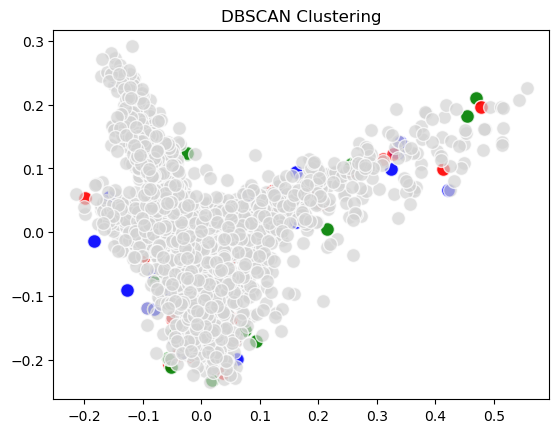

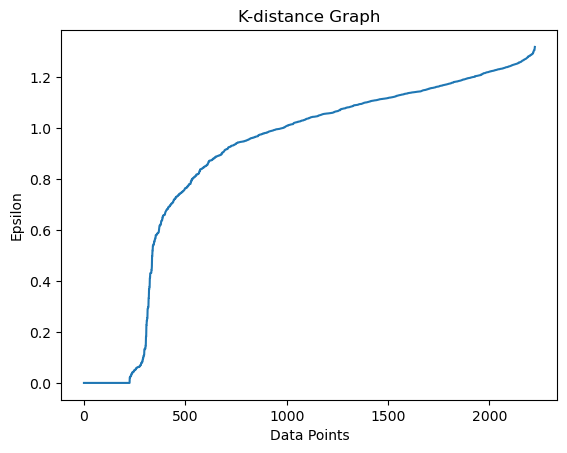

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Packages to install (nltk)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
import numpy as np



# Import the dataset
ds = pd.read_csv('bbc-news-data-modified.csv')

ds["text"] = ds["title"] + " " + ds["content"]

#Tokenization
ds["text"] = ds["text"].apply(lambda x: x.split())


#Stopwords
stop_w = set(stopwords.words("english"))
ds["text"] = ds["text"].apply(lambda x: [word for word in x if word not in stop_w])


#Lemmatization
lem = WordNetLemmatizer()
ds["text"] = ds["text"].apply(lambda x: [lem.lemmatize(word) for word in x])


#Make it back a string and not a list
ds["text"] = ds["text"].apply(lambda x: " ".join(x))

#Vectors
vec = TfidfVectorizer(max_features=5000)
X = vec.fit_transform(ds["text"])

#Estimate the eps
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)
distances, _ = neigh.kneighbors(X,2)
distances = np.sort(distances[:,1])

o_eps = distances[np.argmax(np.diff(distances))]
print(f"Optimal eps: {o_eps}")

#DBSCAN clustering
dbscan = DBSCAN(eps= o_eps, min_samples=2)
y_dbscan = dbscan.fit_predict(X)


#Noise Points
noise = sum(y_dbscan == -1)
print(f"Noise points: {noise}")

#PCA 
pca = PCA(n_components=2).fit(X.toarray())
pca_trans = pca.transform(X.toarray())

#Cluster graph
fig1 = plt.figure()

for i in set(y_dbscan):
    if i == -1:
        color = "lightgrey"
        
    else:
        color = colors[i % len(colors)]
        
    data = pca_trans[y_dbscan==i]
    plt.scatter(data[:,0], data[:,1], c=color, alpha=0.7, edgecolors="w", s=100)
plt.title("DBSCAN Clustering")

'''
Didn't input cmap because it was giving me an error
And I put the other clusters in a lighgrey color, so the colored clusters can be visible.
'''
#K-distance Graph
plt.figure() 
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data Points")
plt.ylabel("Epsilon")



Comments based on the results above

Just by observing at the graphs of the other clustering methods, the DBSCAN clustering has the same data grouped but in different clusters in each method and the cluster labels are arbitrary

The only problem with the DBSCAN clustering technique is that it needs noise points so it can offer the automatic cluster counting.

If we compared it to the K-means, the cluster are divided in parts and we had to specified the number of clusters

With the GMM technique is more a complex clustering technique and it can estimate the clusters in the data

With the agglomerative clustering, it builds it clusters by merging points.

So overall, each technique it's different but the way the data is grouped is different.



Gaussian Mixture Model (GMM) Clustering

Cluster 0: 778
Cluster 1: 458
Cluster 2: 196
Cluster 3: 504
Cluster 4: 289


C:\Users\52871\AppData\Local\Temp\ipykernel_24512\1199322890.py:65: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_trans[:,0], pca_trans[:,1], c=colorsss, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)


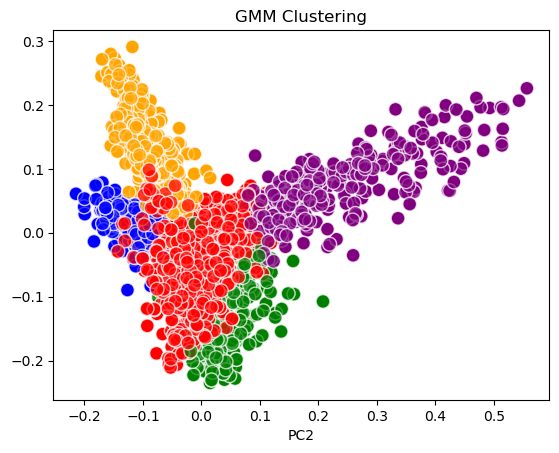

In [33]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA 
from sklearn.mixture import GaussianMixture

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from multiprocessing import cpu_count



# Import the dataset
ds = pd.read_csv('bbc-news-data-modified.csv')

ds["text"] = ds["title"] + " " + ds["content"]

#Tokenization
ds["text"] = ds["text"].apply(lambda x: x.split())


#Stopwords
stop_w = set(stopwords.words("english"))
ds["text"] = ds["text"].apply(lambda x: [word for word in x if word not in stop_w])


#Lemmatization
lem = WordNetLemmatizer()
ds["text"] = ds["text"].apply(lambda x: [lem.lemmatize(word) for word in x])


#Make it back a string and not a list
ds["text"] = ds["text"].apply(lambda x: " ".join(x))

#Vectors
vec = TfidfVectorizer(max_features=5000)
X = vec.fit_transform(ds["text"])

X = X.toarray()


#PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(X)

#GMM clustering
gmm = GaussianMixture(n_components = 5)
gmm.fit(X)
y_gmm = gmm.predict(X)



#Clusters
for i in range(5):
    print(f"Cluster {i}: {sum(y_gmm == i)}")


colorsss = np.array([colors[c] for c in y_gmm])

for i in range(5):
    cluster_data = pca_trans[y_gmm==i]
    plt.scatter(pca_trans[:,0], pca_trans[:,1], c=colorsss, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)
    
plt.title("GMM Clustering")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

Agglomerative Clustering

Cluster  0 :  476
Cluster  1 :  877
Cluster  2 :  197
Cluster  3 :  328
Cluster  4 :  347


C:\Users\52871\AppData\Local\Temp\ipykernel_24512\1165851689.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_trans[idx,0], pca_trans[idx,1], c=colors[i], cmap='rainbow', alpha=0.7, edgecolors='w', s=100)


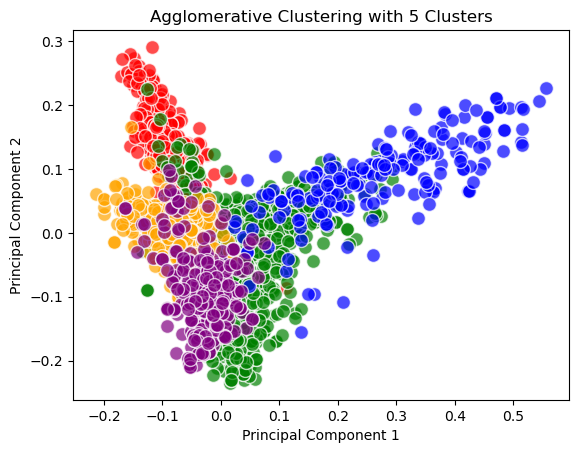

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Packages to install (nltk)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA 



# Import the dataset
ds = pd.read_csv('bbc-news-data-modified.csv')

ds["text"] = ds["title"] + " " + ds["content"]

#Tokenization
ds["text"] = ds["text"].apply(lambda x: x.split())


#Stopwords
stop_w = set(stopwords.words("english"))
ds["text"] = ds["text"].apply(lambda x: [word for word in x if word not in stop_w])


#Lemmatization
lem = WordNetLemmatizer()
ds["text"] = ds["text"].apply(lambda x: [lem.lemmatize(word) for word in x])


#Make it back a string and not a list
ds["text"] = ds["text"].apply(lambda x: " ".join(x))

#Vectors
vec = TfidfVectorizer(max_features=5000)
X = vec.fit_transform(ds["text"])


#Agglomerative Clustering
clusters = AgglomerativeClustering(5)
labels = clusters.fit_predict(X.toarray())

for i in range(5):
    print("Cluster ", i, ": ", sum(labels==i))

#PCA
pca = PCA(n_components=2)
pca.fit(X.toarray())
pca_trans = pca.transform(X.toarray())


colors = ["red", "green", "blue" ,"orange", "purple"]

for i in range(5):
    idx = labels == i
    plt.scatter(pca_trans[idx,0], pca_trans[idx,1], c=colors[i], cmap='rainbow', alpha=0.7, edgecolors='w', s=100)
    
    
plt.title("Agglomerative Clustering with 5 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
